In [1]:
from keras.models import Sequential
from keras.layers import Dense

# optimizer: change the value of weight and biases: to looking for minimum cost
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [2]:
model = Sequential()

In [3]:
# units: how many output value
# input_shape: how many input value
# Dense: as its core do linear function, means if we dont apply any activation function, so it is linear activation function
model.add(Dense(units = 1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

# here we have to 2 parameter, that is  "weight and bias"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer = Adam(lr=0.8), loss='mean_squared_error')

In [7]:
import pandas as pd
df = pd.read_csv('weight-height.csv')

In [8]:
X = df[['Height']].values
y_true = df['Weight'].values

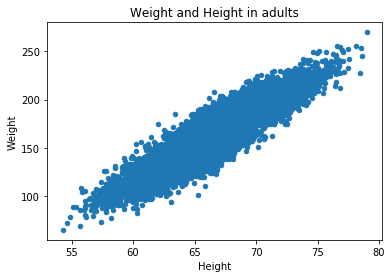

In [10]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [11]:
# find value w and b, to have minimum loss
model.fit(X, y_true, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
10000/10000 [==============================] - 1s 52us/step - loss: 778.0116
Epoch 2/40
10000/10000 [==============================] - 1s 98us/step - loss: 558.3196
Epoch 3/40
10000/10000 [==============================] - 1s 83us/step - loss: 500.2922
Epoch 4/40
10000/10000 [==============================] - 1s 80us/step - loss: 447.3205
Epoch 5/40
10000/10000 [==============================] - 1s 70us/step - loss: 395.9558
Epoch 6/40
10000/10000 [==============================] - 1s 69us/step - loss: 364.3039
Epoch 7/40
10000/10000 [==============================] - 1s 77us/step - loss: 329.1828
Epoch 8/40
10000/10000 [==============================] - 1s 65us/step - loss: 295.1059
Epoch 9/40
10000/10000 [==============================] - 1s 120us/step - loss: 286.6550
Epoch 10/40
10000/10000 [==============================] - 1s 149us/step - loss: 251.8288
Epoch 11/40
10000/10000 [==============================] - 1s 122us/s

In [12]:
y_pred = model.predict(X)

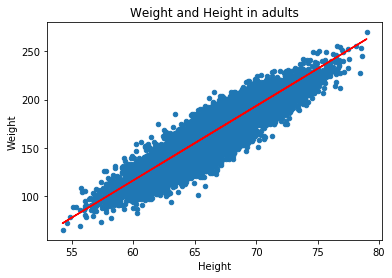

In [16]:
import  matplotlib.pyplot  as plt

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [17]:
W, B = model.get_weights()

In [18]:
W

array([[7.7364626]], dtype=float32)

In [19]:
B

array([-348.19208], dtype=float32)

In [20]:
# Evaluating Model Performance
from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.841


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [22]:
# reset the weight to again train, detraining 

W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [23]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [24]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [25]:
from sklearn.metrics import mean_squared_error as mse

In [26]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	383.1
The Mean Squared Error on the Test set is:	384.3


In [27]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.628
The R2 score on the Test set is:	0.628


In [28]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
